GRADIENT BOOSTING MACHINES

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Veri

In [43]:
# Veri setini yükle
data = pd.read_csv('/data/diabetes.csv')

# Veri setinin ilk 5 satirini incele
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [44]:
# Veri setinin istatistikleri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [45]:
# Giriş değişkenleri (bağımsız değişkenler)
X = data.drop('Outcome', axis=1)

# Çıkış değişkeni (bağımlı değişken)
y = data['Outcome']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model

In [46]:
# GBM modelini oluştur
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

Doğrulama

Accuracy: 0.7467532467532467
Ortalama Cross-Validation Skoru: 0.7734796404019038
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
AUC Score: 0.8091827364554638


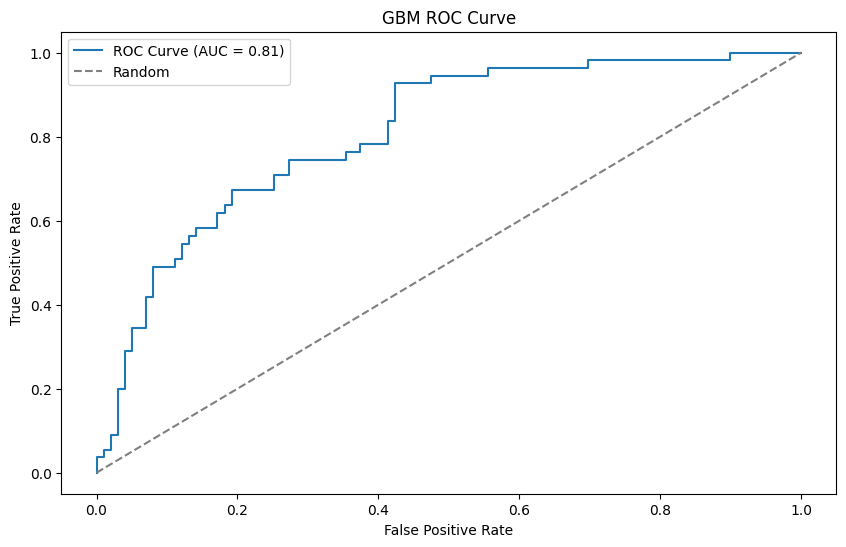

In [47]:

# Doğruluk (Accuracy) ölçütü
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Cross-validation skorlarını al
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print('Ortalama Cross-Validation Skoru:', cv_scores.mean())

# Hassasiyet (Precision) ölçütü
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Duyarlılık (Recall) ölçütü
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1 puanı ölçütü
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# ROC eğrisi ve AUC değeri
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

print('AUC Score:', roc_auc)

# ROC eğrisini çiz
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM ROC Curve')
plt.legend()
plt.show()